In [6]:
!git clone https://github.com/Karandh1r/Capstone

Cloning into 'Capstone'...
remote: Enumerating objects: 22053, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 22053 (delta 0), reused 2 (delta 0), pack-reused 22050
Receiving objects: 100% (22053/22053), 1006.41 MiB | 43.11 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (22046/22046), done.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 20.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [8]:
coughvid_df = pd.read_csv('/content/Capstone/virufy-cdf-coughvid/virufy-cdf-coughvid.csv')

In [ ]:
coughvid_df.head()

,Unnamed: 0,source,patient_id,cough_detected,cough_path,age,biological_sex,reported_gender,submission_date,pcr_test_date,pcr_result_date,respiratory_condition,fever_or_muscle_pain,pcr_test_result,pcr_test_result_inferred,covid_symptoms
0,0,coughvid,ae029647-ddc3-47f5-904e-813358c9dda3,0.8929,virufy-cdf-coughvid/ae029647-ddc3-47f5-904e-81...,NaN,NaN,NaN,2020-10-20T11:05:04.501905+00:00,NaN,NaN,NaN,NaN,untested,untested,NaN
1,1,coughvid,cac4a470-bb86-4db9-9453-d4e2706c3931,0.1431,virufy-cdf-coughvid/cac4a470-bb86-4db9-9453-d4...,NaN,NaN,NaN,2020-04-17T15:12:14.379396+00:00,NaN,NaN,NaN,NaN,untested,untested,NaN
2,2,coughvid,2a3d201f-7c70-449c-adc5-50de728fccd0,0.0803,virufy-cdf-coughvid/2a3d201f-7c70-449c-adc5-50...,38.0,male,male,2020-04-09T20:56:01.725275+00:00,NaN,NaN,False,False,untested,negative,False
3,3,coughvid,8b267d78-97f0-4530-bbfa-e938724376f4,0.1247,virufy-cdf-coughvid/8b267d78-97f0-4530-bbfa-e9...,NaN,NaN,NaN,2020-04-11T11:12:19.213465+00:00,NaN,NaN,NaN,NaN,untested,untested,NaN
4,4,coughvid,68d5215b-afdb-4b7a-81d3-fbd5677de7b4,1.0000,virufy-cdf-coughvid/68d5215b-afdb-4b7a-81d3-fb...,46.0,male,male,2020-11-26T16:21:47.764016+00:00,NaN,NaN,False,False,untested,negative,False


In [9]:
def display_missing_values(df):
  return df.isna().sum()

In [10]:
display_missing_values(coughvid_df)

Unnamed: 0                      0
source                          0
patient_id                      0
cough_detected                  0
cough_path                      0
age                          9903
biological_sex               9084
reported_gender              9084
submission_date                 0
pcr_test_date               22040
pcr_result_date             22040
respiratory_condition        9084
fever_or_muscle_pain         9084
pcr_test_result                 0
pcr_test_result_inferred        0
covid_symptoms              10008
dtype: int64

In [11]:
def drop_columns(df,list):
  df = df.drop(columns = list, axis=1,inplace=True)

In [12]:
drop_columns(coughvid_df,['Unnamed: 0','source','biological_sex','submission_date','pcr_test_date','pcr_result_date'])

In [13]:
def basic_stats(df):
  print(df.info())
  print(df.describe())

In [14]:
basic_stats(coughvid_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22040 entries, 0 to 22039
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                22040 non-null  object 
 1   cough_detected            22040 non-null  float64
 2   cough_path                22040 non-null  object 
 3   age                       12137 non-null  float64
 4   reported_gender           12956 non-null  object 
 5   respiratory_condition     12956 non-null  object 
 6   fever_or_muscle_pain      12956 non-null  object 
 7   pcr_test_result           22040 non-null  object 
 8   pcr_test_result_inferred  22040 non-null  object 
 9   covid_symptoms            12032 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.7+ MB
None
       cough_detected           age
count    22040.000000  12137.000000
mean         0.649919     36.724289
std          0.387780     14.587690
min          0.000000      1.0

In [15]:
def missing_values_percentage(df,column):
  return (df[column].isna().sum())/len(df)*100

In [16]:
missing_values_percentage(coughvid_df,'age')

44.93194192377496

In [17]:
missing_values_percentage(coughvid_df,'reported_gender')

41.21597096188748

In [18]:
missing_values_percentage(coughvid_df,'covid_symptoms')

45.40834845735027

In [19]:
def remove_na_rows(df,column):
  ls = []
  ls = df[df[column].isna()].index
  df = df.drop(labels=ls, axis=0, inplace = True)

In [20]:
remove_na_rows(coughvid_df,'age')

In [21]:
coughvid_df = coughvid_df[coughvid_df['pcr_test_result_inferred']!='untested']

In [22]:
pcr_cough = coughvid_df.groupby(['pcr_test_result_inferred'])['cough_detected'].mean().reset_index()
pcr_cough

,pcr_test_result_inferred,cough_detected
0,negative,0.763053
1,positive,0.723661


[Text(0, 0, '0.763053'), Text(0, 0, '0.723661')]

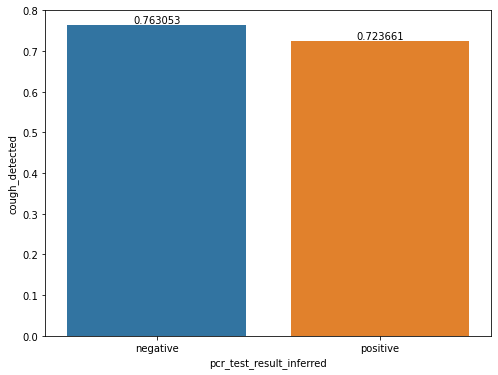

In [23]:
plt.figure(figsize=(8,6))
fig1 = sns.barplot(data=pcr_cough, x = 'pcr_test_result_inferred', y = 'cough_detected')
fig1.bar_label(fig1.containers[0])

In [24]:
gender_cough = coughvid_df.groupby(['reported_gender'])['cough_detected'].mean().reset_index()
gender_cough

,reported_gender,cough_detected
0,female,0.734176
1,male,0.772933
2,other,0.610502


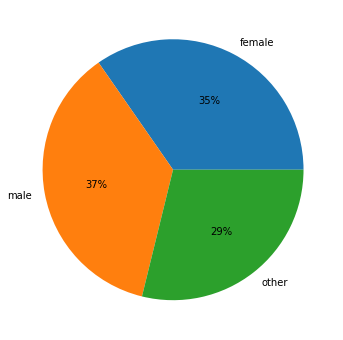

In [25]:
plt.figure(figsize=(8,6))
plt.pie(x = list(gender_cough['cough_detected']), labels = list(gender_cough['reported_gender']),autopct='%.0f%%')
plt.show()

In [26]:
coughvid_df.loc[(coughvid_df['age'] >= 0) & (coughvid_df['age'] < 18), 'ClassificationByAge'] = 'Children'
coughvid_df.loc[(coughvid_df['age'] >= 18) & (coughvid_df['age'] < 60), 'ClassificationByAge'] = 'Adult'
coughvid_df.loc[(coughvid_df['age'] >= 60), 'ClassificationByAge'] = 'Senior'

In [27]:
coughvid_df['ClassificationByAge'].value_counts()

Adult       8618
Senior       858
Children     668
Name: ClassificationByAge, dtype: int64

In [28]:
age_cough = coughvid_df.groupby(['ClassificationByAge'])['cough_detected'].mean().reset_index()
age_cough

,ClassificationByAge,cough_detected
0,Adult,0.773676
1,Children,0.715978
2,Senior,0.657789


[Text(0, 0, '0.773676'), Text(0, 0, '0.715978'), Text(0, 0, '0.657789')]

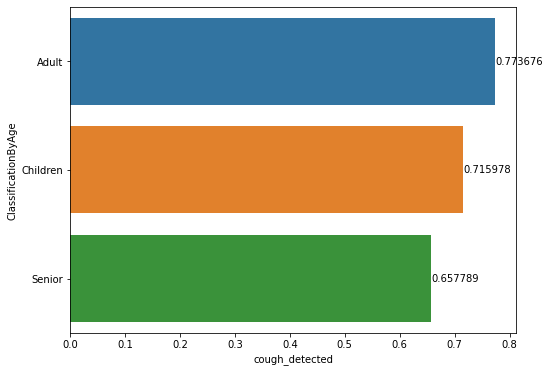

In [29]:
plt.figure(figsize=(8,6))
fig3 = sns.barplot(data=age_cough, x = 'cough_detected', y='ClassificationByAge')
fig3.bar_label(fig3.containers[0])

In [30]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.6.0-py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 KB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 889.3/889.3 KB 57.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 KB 20.3 MB/s eta 0:00:00
  Created wheel for html5lib: filename=html5lib-0.9999999-py3-none-any.whl size=107233 sha256=bf8f523bc0eaa7fa8400c8619a65c224fe720d68e

In [58]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate label'
for i in range(1, 21):
    header += f' mfcc{i}'
#header += ' label'
header = header.split()
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'label', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']


In [ ]:
file = open('data.csv', 'w', newline='')
featured_df = pd.read_csv('Capstone/virufy-cdf-coughvid/virufy-cdf-coughvid.csv')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
filepath = "Capstone/virufy-cdf-coughvid/data"
for index,file_name in enumerate(os.listdir(filepath)[:10000]):
    filename = f"Capstone/virufy-cdf-coughvid/data/{file_name}"    
    y, sr = librosa.load(filename, mono=True)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} {featured_df["pcr_test_result_inferred"][index]}'
    for e in mfcc:
      to_append += f' {np.mean(e)}' 
    file = open('data.csv', 'a', newline='')
    with file:
      writer = csv.writer(file)
      writer.writerow(to_append.split())


In [104]:
featured_df = pd.read_csv('/content/data.csv')
featured_df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,label,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,Capstone/virufy-cdf-coughvid/data/96532d0b-e03...,0.246568,0.017675,750.296929,870.727132,1167.885280,0.056235,untested,-538.788574,79.788200,...,-11.927303,-8.343564,-3.942297,-4.267561,-1.465172,-2.462450,0.667762,2.863011,3.349436,2.755264
1,Capstone/virufy-cdf-coughvid/data/7985283f-987...,0.134691,0.001108,906.498696,619.463686,1511.273001,0.065169,untested,-738.053650,16.934408,...,-0.503222,-2.186954,0.668987,0.073172,-0.548880,0.093867,-0.739526,-0.740927,-0.958437,-1.109300
2,Capstone/virufy-cdf-coughvid/data/746aded4-a8b...,0.425642,0.027305,2305.653843,2288.142548,4927.119621,0.121683,negative,-483.577789,35.079132,...,-0.276858,-4.925006,0.181856,-1.381158,-1.196408,-4.674263,0.094589,-3.787151,-2.635709,-1.895576
3,Capstone/virufy-cdf-coughvid/data/c2d28bee-ee5...,0.429983,0.009373,2370.408117,2634.377257,5392.109819,0.117298,untested,-514.245789,68.695496,...,-5.206551,-4.555282,2.533046,3.792540,-2.761649,2.501842,-1.106822,1.811024,-2.274859,0.027196
4,Capstone/virufy-cdf-coughvid/data/54ca6049-40f...,0.366532,0.010191,2042.949540,1564.907570,3704.819264,0.092264,negative,-536.768738,50.518822,...,-1.034474,-12.892360,2.925161,1.065772,-4.572877,-8.343991,-3.224952,-2.764955,-4.941463,-6.563676


In [105]:
featured_df = featured_df[featured_df['label']!='untested']

In [106]:
featured_df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,label,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
2,Capstone/virufy-cdf-coughvid/data/746aded4-a8b...,0.425642,0.027305,2305.653843,2288.142548,4927.119621,0.121683,negative,-483.577789,35.079132,...,-0.276858,-4.925006,0.181856,-1.381158,-1.196408,-4.674263,0.094589,-3.787151,-2.635709,-1.895576
4,Capstone/virufy-cdf-coughvid/data/54ca6049-40f...,0.366532,0.010191,2042.949540,1564.907570,3704.819264,0.092264,negative,-536.768738,50.518822,...,-1.034474,-12.892360,2.925161,1.065772,-4.572877,-8.343991,-3.224952,-2.764955,-4.941463,-6.563676
5,Capstone/virufy-cdf-coughvid/data/20b15c2c-c3b...,0.457607,0.021929,2183.783684,2002.656158,4485.477590,0.128356,negative,-474.503021,56.867310,...,-4.673470,-4.548334,3.300208,-1.457334,-2.984739,-1.904081,-2.017654,-2.759113,-2.372814,-0.361269
6,Capstone/virufy-cdf-coughvid/data/0084c60b-ea8...,0.593544,0.039121,2215.148309,2080.573018,4526.687772,0.281258,positive,-418.722626,52.449600,...,3.056303,-3.695687,0.101675,1.146169,2.948937,-1.827530,-0.015979,-1.015139,-1.365296,-0.812002
12,Capstone/virufy-cdf-coughvid/data/ef081e3c-a74...,0.542502,0.001299,2446.359737,2226.648587,4989.328494,0.194831,negative,-709.428345,50.311527,...,-3.392588,-3.953157,-3.606393,-3.755292,-4.646735,-4.662539,-3.779958,-2.062461,-2.822699,-3.499199


In [107]:
print(len(featured_df['label']))

22


In [108]:
label_list = featured_df['label']
encoder = LabelEncoder()
featured_df['label'] = encoder.fit_transform(featured_df['label'])
print(featured_df['label'])

2     0
4     0
5     0
6     1
12    0
14    0
15    0
19    0
20    0
21    0
22    0
24    0
25    0
26    0
28    0
35    0
36    1
37    0
39    0
45    0
46    0
48    0
Name: label, dtype: int64


In [109]:
scaler = StandardScaler()
X = featured_df.drop(['label','filename'],axis=1)
y = featured_df['label']
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(y_train)
print(y_test)


5     0
45    0
14    0
19    0
37    0
21    0
15    0
28    0
26    0
48    0
35    0
36    1
4     0
6     1
22    0
46    0
24    0
Name: label, dtype: int64
12    0
2     0
39    0
25    0
20    0
Name: label, dtype: int64


In [110]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [111]:
classifier = model.fit(X_train,y_train,epochs=20,batch_size=128)

Epoch 1/20
1/1 [==============================] - 1s 838ms/step - loss: 0.6119 - accuracy: 0.8235
Epoch 2/20
1/1 [==============================] - 0s 12ms/step - loss: 0.4763 - accuracy: 0.8824
Epoch 3/20
1/1 [==============================] - 0s 11ms/step - loss: 0.3793 - accuracy: 0.8824
Epoch 4/20
1/1 [==============================] - 0s 13ms/step - loss: 0.3130 - accuracy: 0.8824
Epoch 5/20
1/1 [==============================] - 0s 8ms/step - loss: 0.2610 - accuracy: 0.8824
Epoch 6/20
1/1 [==============================] - 0s 9ms/step - loss: 0.2185 - accuracy: 0.8824
Epoch 7/20
1/1 [==============================] - 0s 9ms/step - loss: 0.1831 - accuracy: 0.8824
Epoch 8/20
1/1 [==============================] - 0s 9ms/step - loss: 0.1520 - accuracy: 0.8824
Epoch 9/20
1/1 [==============================] - 0s 8ms/step - loss: 0.1249 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 12ms/step - loss: 0.1026 - accuracy: 1.0000
Epoch 11/20
1/1 [================

In [112]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

1/1 [==============================] - 0s 116ms/step - loss: 0.0206 - accuracy: 1.0000
test_acc:  1.0
